# **Ciclo de Vida de un Modelo ML**


**Preparación del Modelo:**


Entrenamiento del Modelo:
Utiliza conjuntos de datos de entrenamiento y validación.
Ajusta los hiperparámetros para obtener el mejor rendimient
**
2. Empaquetado del Mod**
  elo:
Guarda el Modelo:
Exporta el modelo entrenado a un formato específico (por ejemplo, formato ONNX, HDF5).
Requisitos de Entorno:
Documenta las dependencias y requisitos del entorno necesario para ejecutar el modelo (bibliotecas, versiones de Python,
**c.).
3. Desarrollo de la Infraes**
tructura:
Selecciona una Plataforma de Despliegue:
Puedes utilizar servicios en la nube (como AWS SageMaker, Google AI Platform, Azure ML) o servidores locales.
Configuración del Entorno:
Prepara el entorno para el despliegue, asegurándote de que todas las dependencias estén
**staladas.
4. Desarrollo de la A**
PI o Interfaz:

Crea una API:
Desarrolla una interfaz (API REST, GraphQL) para que los usuarios interactúen con el modelo.
Utiliza frameworks como Flask, FastA
PI, Django, etc.
Manejo de 
Entradas/Salidas:
Define cómo se enviarán las solicitudes al modelo y cómo se recibirán
**s predicciones.
5. Seguridad**
y Control de Acceso:
Autentic
ación y Autorización:
Implementa medidas de seguridad para controlar el acceso a la API.
Usa tokens, autenticaci
**basada en A**
PI, etc.
6. Despliegue:
Implementación Continua (CI) / 
Despliegue Continuo (CD):
Configura pipelines CI/CD para automatizar el despliegue d
el modelo.
Monitorización:
Establece métricas y monitoreo para supervisar el rendimient
**el modelo en producción.
7. Escalab**
ilidad y Tolerancia a Fallos:
Escalabilidad Horizontal:
Asegúrate de que el sistema pueda manejar un aumento en la carga de solicitudes.
Implementa balancea
dores de carga si es necesario.
Manejo de Errores y Fallos:
Incorpora manejo de errores y mecanismos 
**recupera**
ción en la aplicación.
8. Pruebas:
Pruebas Unitarias y de Integración:
Realiza pruebas exhaustivas para garantizar que el modelo y la API funcionen correctamente.
Re
**za pruebas de **rendimiento y carga.
9. Documentación:
Documenta el Despliegue:
Proporciona documentación detallada sobre cómo usar la API, qué es
**r y cómo interpretar los**
 resultados.
10. Monitorización Continua:
Supervisión del Rendimiento:
Implementa sistemas de monitorización continua para detectar problemas de rendimi
** o cambios en la distribución de** 
datos.
11. Actualizaciones y Mantenimiento:
Gestión de Versiones:
Gestiona las versiones del modelo y la API.
Planif
**y documenta las ac**
tualizaciones del modelo.
12. Retiro del Modelo:
Planificación para la Obsolescencia:
Planifica la retirada del modelo cuando sea necesario, proporcionando transiciones suaves si es posible.

## **Crear una App para consumir el Modelo**

Existen varias formas de desplegar un modelo de machine learning en producción, y la elección depende de diversos factores, como la infraestructura disponible, el tamaño del modelo, el rendimiento requerido, la escalabilidad y la complejidad del sistema en general. Algunas de las formas comunes de desplegar modelos de machine learning en producción son las siguientes:

* Servicios web/APIs: Un enfoque común es implementar el modelo detrás de una API (Application Programming Interface). Esto permite que otras aplicaciones o servicios se comuniquen con el modelo enviando solicitudes HTTP y recibiendo respuestas JSON. Ejemplos de frameworks populares para crear APIs son Flask (Python) o Express.js (Node.js).

* Microservicios: Similar al enfoque de API, pero utilizando una arquitectura de microservicios. En este caso, el modelo se implementa como un microservicio que se comunica con otros componentes del sistema a través de solicitudes y respuestas.

* Contenedores: El modelo y sus dependencias se empaquetan en un contenedor (por ejemplo, Docker) para que se puedan desplegar fácilmente en diferentes entornos y plataformas.

* Serverless: En plataformas serverless como AWS Lambda o Azure Functions, puedes ejecutar el modelo como una función que se activa en respuesta a eventos específicos, sin preocuparte por el servidor subyacente.

* Cloud Machine Learning Platforms: Los principales proveedores de servicios en la nube (como AWS, Azure y Google Cloud) ofrecen plataformas específicas para desplegar y gestionar modelos de machine learning en producción, como AWS SageMaker, Azure Machine Learning y Google Cloud AI Platform.

* Inference en el Edge: En algunos casos, se puede desplegar el modelo directamente en dispositivos de borde (como dispositivos IoT o móviles) para realizar inferencia local sin depender de una conexión a la nube.

* Plataformas de orquestación: Utilizar herramientas de orquestación y gestión de modelos, como Kubeflow, Apache Airflow o MLflow, para simplificar el despliegue y la gestión de modelos en producción.

## **Introducción a Streamlit**
* https://docs.streamlit.io/
Según los fundadores de Streamlit, es la forma más rápida de crear aplicaciones de datos y compartirlas. Es una herramienta de implementación de modelos reciente que simplifica todo el ciclo de implementación de modelos y le permite implementar sus modelos rápidamente.

In [1]:
# conda install -c conda-forge streamlit
# !pip install streamlit

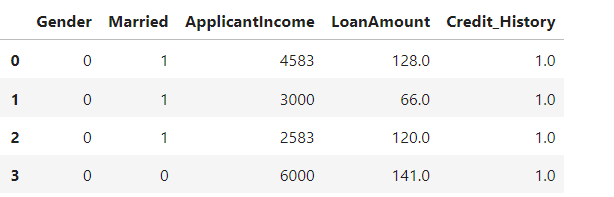

## Crear la App con Streamlit

In [2]:
%%writefile app.py
import pickle
import streamlit as st

## Importar el Modelo

with open('clasificador_credito_rf.pkl', 'rb') as file:
    clasificador = pickle.load(file)
    
@st.cache()

## Definir la Funciòn de predicciòn

def prediction(Gender,	Married,	ApplicantIncome	,LoanAmount,	Credit_History):
    if (Gender=="Male"):
        Gender=0
    else:
        Gender=1
    if (Married=="Unmarried"):
        Married=0
    else:
        Married=1
    if (Credit_History=="Unclear Debts"):
        Credit_History=0
    else:
        Credit_History=1
        
    LoanAmount=LoanAmount/1000
    prediccion=clasificador.predict([[Gender,	Married,	ApplicantIncome	,LoanAmount,	Credit_History]])
    if prediccion==0:
        pred="Rejected"
    else:
        pred="Approved"
    return pred

## Definir la App para consumir el modelo

def main():
    html_temp="""
    <div style ="background-color:yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Streamlit Loan Prediction ML App</h1> 
    </div> 
    """
    st.markdown(html_temp, unsafe_allow_html = True)
    Gender=st.selectbox("Gender",("Male","Female"))
    Married=st.selectbox("Marital Status",("Unmarried","Married"))
    ApplicantIncome=st.number_input("Applicants monthly income")
    LoanAmount = st.number_input("Total loan amount")
    Credit_History = st.selectbox('Credit_History',("Unclear Debts","No Unclear Debts"))
    result=""
    if st.button("Predict"):
        result=prediction(Gender,Married,ApplicantIncome,LoanAmount,Credit_History)
        st.success('Your loan is {}'.format(result))
        print(LoanAmount)

if __name__=='__main__': 
    main()

Overwriting app.py


In [3]:
import sklearn
print("Versión de scikit-learn:", sklearn.__version__)

Versión de scikit-learn: 1.3.2
